*<center><h1><b>Computer Assignment 1</b></h1>*
*<h3>Narges Sadat Seyed Haeri</h3></center>*
*<center><h3>SID : 810100165</h3></center>*

<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Knapsack Problem Description</title>
</head>
<body>

<h2>Problem Description:</h2>

<p>Given a knapsack with a maximum weight capacity <em>W</em>, a set of <em>n</em> snacks, each with a weight <em>w<sub>i</sub></em> and a value <em>v<sub>i</sub></em>, where <em>1 &le; i &le; n</em>. Additionally, there are constraints:</p>

<ul>
  <li>The total weight of selected snacks cannot exceed <em>W</em>.</li>
  <li>The total value of selected snacks must be at least <em>V<sub>min</sub></em>.</li>
  <li>The number of distinct types of snacks selected must fall within the range [<em>K<sub>min</sub></em>, <em>K<sub>max</sub></em>].</li>
  <li>The weight selected from each snack cannot exceed its available weight <em>w<sub>max</sub></em>.</li>
</ul>

<h2>Goal:</h2>

<p>Maximize the total value of selected snacks while adhering to the specified constraints.</p>

</body>
</html>


---
*Let's start by importing the libraries we need:*

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


*We'll load the data and examine its overall characteristics.*

In [2]:
SNACK_DATA_SET_DIR = "snacks.csv"
snack_df = pd.read_csv(SNACK_DATA_SET_DIR)

In [3]:
print(snack_df)

            Snack  Available Weight  Value
0          MazMaz                10     10
1   Doogh-e-Abali                15     10
2            Nani                 5      5
3            Jooj                 7     15
4         Hot-Dog                20     15
5           Chips                 8      6
6        Nooshaba                12      8
7        Shokolat                 6      7
8       Chocoroll                 9     12
9         Cookies                11     11
10        Abnabat                 4      4
11   Adams-Khersi                14      9
12        Popcorn                16     13
13         Pastil                 3      7
14       Tordilla                10      9
15       Masghati                 5      6
16        Ghottab                 7     10
17   Saghe-Talaei                 9     11
18    Choob-Shoor                13     12


*With the Item class defined, we can create instances of items for our knapsack problem.*

In [4]:
class Item:
    def __init__(self, name, weight, value):
        self.name = name
        self.weight = weight
        self.value = value

*we convert snack data into a list of Item objects, each representing a snack with its respective attributes, for use in a knapsack algorithm.*

In [5]:
item_list = []
# Create a list of Item objects
for index, row in snack_df.iterrows():
    item = Item(row['Snack'], float(row['Available Weight']), float(row['Value']))
    item_list.append(item)

# Now 'items' list contains Item objects
for item in item_list:
    print(f"Name: {item.name}, W: {item.weight}, V: {item.value}")    

Name: MazMaz, W: 10.0, V: 10.0
Name: Doogh-e-Abali, W: 15.0, V: 10.0
Name: Nani, W: 5.0, V: 5.0
Name: Jooj, W: 7.0, V: 15.0
Name: Hot-Dog, W: 20.0, V: 15.0
Name: Chips, W: 8.0, V: 6.0
Name: Nooshaba, W: 12.0, V: 8.0
Name: Shokolat, W: 6.0, V: 7.0
Name: Chocoroll, W: 9.0, V: 12.0
Name: Cookies, W: 11.0, V: 11.0
Name: Abnabat, W: 4.0, V: 4.0
Name: Adams-Khersi, W: 14.0, V: 9.0
Name: Popcorn, W: 16.0, V: 13.0
Name: Pastil, W: 3.0, V: 7.0
Name: Tordilla, W: 10.0, V: 9.0
Name: Masghati, W: 5.0, V: 6.0
Name: Ghottab, W: 7.0, V: 10.0
Name: Saghe-Talaei, W: 9.0, V: 11.0
Name: Choob-Shoor, W: 13.0, V: 12.0


<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="UTF-8">
<meta name="viewport" content="width=device-width, initial-scale=1.0">
<title>Constants</title>
<style>
  body {
    font-size: 20px;
  }
  li {
    font-size: 15px;
  }
</style>
</head>
<body>

<h2>Defining Constants:</h2>

<ul>
  <li><strong>MAX_WEIGHT:</strong> The maximum weight capacity of the knapsack.</li>
  <li><strong>MIN_VALUE:</strong> The minimum total value required for selected snacks.</li>
  <li><strong>MAX_NUMBER:</strong> The maximum number of distinct types of snacks allowed to be selected.</li>
  <li><strong>MIN_NUMBER:</strong> The minimum number of distinct types of snacks required to be selected.</li>
  <li><strong>POPULATION_SIZE:</strong> The size of the population (number of chromosomes) in the genetic algorithm.</li>
  <li><strong>GENERATION_NUMBER:</strong> The number of generations for which the genetic algorithm will run.</li>
  <li><strong>CROSSOVER_RATE:</strong> The probability of crossover occurring between two parent chromosomes during reproduction.</li>
  <li><strong>MUTATION_RATE:</strong> The probability of mutation occurring in a chromosome during reproduction.</li>
</ul>

</body>
</html>




In [6]:
MAX_WEIGHT = 18.0
MIN_VALUE = 30.0
MAX_NUMBER = 10
MIN_NUMBER = 1
POPULATION_SIZE = 1000
GENERATION_NUMBER = 1000
CROSSOVER_RATE = 0.9
MUTATION_RATE = 0.3

# *Initial population*
*This function generates an initial population for the genetic algorithm. It first creates an empty 2D NumPy array with dimensions size of population and lenght of items. Then, for each chromosome in the population, it generates a random number between 0 and 1 for each gene, corresponding to a specific item in the item_list.*

In [7]:
def intial_population(POPULATION_SIZE, item_list):
    return np.random.rand(POPULATION_SIZE, len(item_list)) 

# *Penalty Function:*

*Evaluates penalties for a chromosome based on weight, total value, and number of selected snacks.*
*Considers exceeding weight limit, falling short of value requirement, and selecting inappropriate number of snacks.*
*Computes penalties proportional to deviations from constraints.*

# *Fitness Function:*

*Determines fitness score of a chromosome by subtracting its penalty from total value.*
*Encourages genetic algorithm to prioritize solutions maximizing total snack value while meeting constraints.*

In [8]:
def penalty(chromosome):
    C1, C2 , C3 = 20,5,15
    weight = chromosome.dot([item.weight for item in item_list])
    weight_punishment = ((weight > MAX_WEIGHT) * (weight - MAX_WEIGHT)) * C1
    total_value = chromosome.dot([item.value for item in item_list])
    value_punishment = ((total_value < MIN_VALUE) * (MIN_VALUE - total_value)) * C3 
    num = np.count_nonzero(chromosome)
    num_punishment = ((num > MAX_NUMBER) * (num - MAX_NUMBER) + (num < MIN_NUMBER) * (MIN_NUMBER - num)) * C2
    total_punishment = weight_punishment + num_punishment + value_punishment
    return total_punishment

def fitness(chromosome):    
    total_value = chromosome.dot([item.value for item in item_list])
    fitness = total_value - penalty(chromosome)
    return fitness
    

# *Crossover Function:*
*When we execute this function, we're essentially performing a one-point crossover operation in genetic algorithms. If the randomly generated value is greater than the specified crossover probability, we keep the original parents. However, if it's less than or equal to the crossover probability, we randomly select a crossover point. Then, we swap genetic material between the parents at that point to create two children. Finally, we return these children as the result.*

In [9]:
def one_point_crossover(parent1, parent2, p_crossover):
    if random.random() > p_crossover:
        return parent1, parent2
    crossover_point = random.randint(1, len(parent1)-1)
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

# *Mutation Function:*
*when we execute this function, we're essentially performing a mutation operation in genetic algorithms. If the randomly generated value is greater than the specified mutation rate, we simply return the original chromosome. However, if it's less than or equal to the mutation rate, we proceed to randomly select an index within the chromosome. Then, we replace the value at that index with a new randomly generated value.*

In [10]:
def mutation (chromosome,mutation_rate):
    if np.random.random() > mutation_rate:
        return chromosome
    rand_index = np.random.randint(len(chromosome))
    chromosome[rand_index]=np.random.random()
    return chromosome

*We start by sorting the population based on their fitness, where higher fitness corresponds to a higher index in the sorted population. Then, we calculate probabilities for each chromosome, ensuring that individuals with better fitness have a higher probability of being selected for the mating pool. After that, we randomly choose indices from the population according to these probabilities, using the calculated distribution to bias selection towards fitter individuals. Finally, we construct the mating pool by extracting individuals corresponding to the selected indices, forming pairs of individuals for mating. This approach optimizes the selection process, favoring individuals with superior fitness while maintaining diversity within the mating pool.*

In [11]:
def mating_pool(population, size):
    population = np.array(sorted(population, key=lambda x: fitness(x)))
    indices = np.arange(1, len(population) + 1)
    probs = indices / indices.sum()
    indices = np.random.choice(len(population), size=size, p=probs)
    item_list_length = population.shape[1]
    return population[indices, :].reshape((-1, 2, item_list_length))

*This function essentially helps to focus on the more significant elements of the chromosome by zeroing out or reducing the impact of smaller elements. It calculates a threshold value by dividing the sum of all elements in the chromosome by ten times the length of the chromosome. then we set all elements in the chromosome that are less than this threshold to zero. This effectively removes or reduces the influence of elements that are relatively small compared to the overall sum of the chromosome.*

In [12]:
def normalize_chromosome(chromosome):
    chromosome[chromosome < chromosome.sum()/(len(chromosome)*10)] = 0

In [13]:
def check_constraint(chromosome):
    sum_weight = chromosome.dot([item.weight for item in item_list])
    sum_val = chromosome.dot([item.value for item in item_list])
    if (sum_weight>MAX_WEIGHT) or (sum_val < MIN_VALUE) or (np.count_nonzero(chromosome)>MAX_NUMBER) or (np.count_nonzero(chromosome)<MIN_NUMBER):
        return 0
    return 1


## *Testing the result*
*in this function, we begin by setting up an intial population, then iteratively refines it over a fixed number of generations. In each generation, we normalizes the chromosome, form a mating pool, perform crossover and mutation to create the new population accordingly. The best fitness value of each generation is tracked and plotted. If a valid solution satisfying constraints is found, the algorithm terminates early. Finally, it returns the best solution found along with its total value and weight.*

In [14]:
def genetic_algorithm(population,item_list):
    best_fitness_of_each_generation =[]
    for i in range(GENERATION_NUMBER):
        for chromosome in population:
            normalize_chromosome(chromosome)
        mating = mating_pool(population, len(population))
        new_population = []
        for parents in mating:
            child1, child2 = one_point_crossover(parents[0], parents[1], CROSSOVER_RATE)
            child1 = mutation(child1, MUTATION_RATE)
            child2 = mutation(child2, MUTATION_RATE)
            new_population.append(child1)
            new_population.append(child2)
        population = np.array(new_population)
        population = np.array(sorted(population, key=lambda x: fitness(x), reverse=True))
        best_fitness_of_each_generation.append(fitness(population[0]))
        if(check_constraint(population[0])):
            break


    # Plotting
    plt.plot(best_fitness_of_each_generation)
    plt.title('Best Fitness Across Generations')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.show()
    print("Total value of selected items:", population[0].dot([item.value for item in item_list]))
    print("Total weight of selected items:",population[0].dot([item.weight for item in item_list]))
    selected_items = [(item.name, amount * item.weight) for i, amount in enumerate(population[0]) if amount != 0]
    constraint_result = "Satisfies constraints" if check_constraint(population[0]) else "Does not satisfy constraints"
    print("Constraint check result:", constraint_result)
    print("Items selected:")
    for i, amount in enumerate(population[0]):
            item_weight = amount * item_list[i].weight
            print(f"{item_list[i].name}: {item_weight}")
            
    return population

In [15]:
init_population = intial_population(POPULATION_SIZE, item_list)

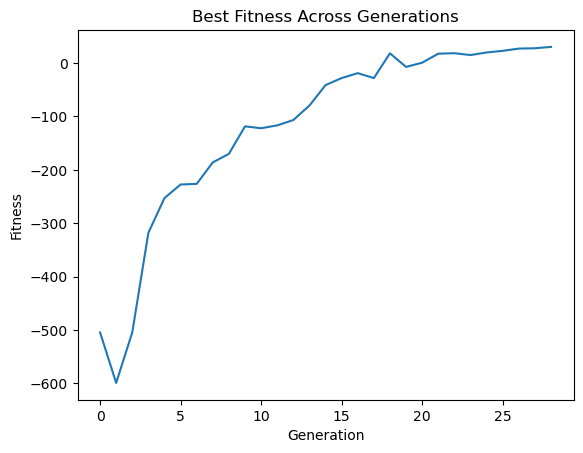

Total value of selected items: 30.086289730754206
Total weight of selected items: 17.659959826618437
Constraint check result: Satisfies constraints
Items selected:
MazMaz: 0.8330466084575872
Doogh-e-Abali: 0.0
Nani: 0.223261992024813
Jooj: 6.418147021283645
Hot-Dog: 0.0
Chips: 0.4306152186957961
Nooshaba: 0.0
Shokolat: 1.9314155567165494
Chocoroll: 0.0
Cookies: 0.0
Abnabat: 0.0
Adams-Khersi: 0.0
Popcorn: 0.0
Pastil: 2.3847964165417954
Tordilla: 1.0922046635256721
Masghati: 0.24598876842309714
Ghottab: 4.100483580949481
Saghe-Talaei: 0.0
Choob-Shoor: 0.0


In [16]:
pop = genetic_algorithm(init_population, item_list)

*The plot displays the trend of the best fitness value across generations during the execution of the genetic algorithm. Each point on the plot represents the best fitness value achieved in each generation. As the algorithm progresses through generations, the plot illustrates how the fitness of the best solution found so far evolves over time. This visualization helps in understanding the convergence behavior of the algorithm and whether it is making progress towards finding an optimal solution. If the plot shows an increasing trend or stabilizes at a high fitness value, it indicates that the algorithm is successfully improving solutions. On the other hand, if the plot remains flat or fluctuates without improvement, it suggests that the algorithm may be struggling to find better solutions or may have converged prematurely.*

---

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width, initial-scale=1.0">
  <title style="color: blue;">Genetic Algorithm Questions</title>
  <style>
    body {
      font-family: Arial;
      line-height: 1.6;
    }
    p {
      margin-bottom: 20px;
    }
  </style>
</head>
<body>
  <h2>Genetic Algorithm Questions</h2>
  <ol>
    <li>
      <strong>What happens if our population is too big or small?</strong>
      <p>If there are lots of individuals in the population, we might find the best solution faster because there's more variety to choose from. But it also means the computer needs more time and memory. If there are only a few individuals, there's less variety, so it's harder to find the best solution. We might not even find it at all.</p>
    </li>
    <li>
      <strong>What happens if the population increases after each generation?</strong>
      <p>If we make the population bigger with each generation, it means there are more and more individuals to choose from. This can be helpful because it increases the diversity of possible solutions. However, it also means the computer needs more time and memory to handle all those individuals. Usually, we keep the population the same size throughout to help the chromosomes converge to the best solution. If we make the population bigger, it might actually make it harder for the chromosomes to converge to that best solution.</p>
    </li>
    <li>
      <strong>What are the effects of crossover and mutation and what happens if we use only one of them?</strong>
      <p>Crossover and mutation are both important operations in genetic algorithms. Crossover combines good chromosomes to create better ones, while mutation directly changes the genes of a chromosome, helping to explore new possibilities and escape local optima. If we use only one of them, we may encounter limitations. For instance, relying solely on crossover may not lead to an optimal solution, as mutation introduces necessary randomness to explore new areas of the solution space. Conversely, only using mutation might not result in convergence to the best solution because it lacks the effectiveness of crossover in combining beneficial traits. However, in certain scenarios with specific parameters, solely relying on mutation may lead to the answer.</p>
    </li>
    <li>
      <strong>What are some ways to find the answer faster?</strong>
      <p>Experimenting with algorithm parameters can help find optimal settings for faster convergence. Additionally, adjusting crossover and mutation rates, population size, and termination conditions can enhance performance.</p>
    </li>
    <li>
      <strong>How can we solve the problem of chromosomes getting stuck after some generations?</strong>
      <p>Using mutation can help prevent chromosomes from getting stuck in local optima. Alternatively, employing multi-start strategies by running the algorithm with different initial populations can increase exploration and potentially find better solutions.</p>
    </li>
    <li>
      <strong>What can we do to stop the algorithm if the problem doesn't have any solutions?</strong>
      <p>Setting a maximum generation limit can prevent the algorithm from running indefinitely. If no solutions are found within the limit, the algorithm can return the chromosome with the best fitness in the final population.</p>
    </li>
  </ol>
</body>
</html>
